# Bank Data Analysis

## Goals

Goal is to analyze the supplied data and answer some questions.
The questions will be outlined in the notebook with prefix [Qi] where i is index. Question will also include english translation and original czech version. For example:
[Q1] What's the highest age of applicants? (Jaký je nejvyšší věk žadatele?)

## Data Loading

In [1]:
!pip install -q pandas openpyxl matplotlib optbinning seaborn

In [2]:
!ls ../data

external  raw


In [3]:
# constants
DATA_PATH = "../data/raw/data.xlsx"

# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df = pd.read_excel(DATA_PATH)

## Data Exploration

We explore the dataset and answer some basic questions. But we only focus on some columns more in detial.

In [5]:
df

,CODE_ZIP,AMT_NET_INCOME,AMT_REQUESTED_TICKET,TEXT_BANK,NUM_AGE,TEXT_GENDER,NFLAG_MOBILEDEVICE,CODE_IP_1,NUM_LEVEN_EMAIL,NFLAG_EMAIL_NUMERAL,CNT_REJECTED,NUM_DAYS_CREDIT_HISTORY,TARGET
0,18100,22000,8000,"Česká spořitelna, a.s.",37,Muž,0,178,40,0,1,450,0
1,79501,28000,10000,"Komerční banka, a.s.",58,Muž,0,85,88,0,1,7100,0
2,69661,10800,1000,"Československá obchodní banka, a.s.",32,Muž,1,131,16,0,1,750,0
3,43111,10000,6000,"Československá obchodní banka, a.s.",24,Žena,1,78,50,1,1,0,0
4,74201,32000,8000,"Česká spořitelna, a.s.",34,Muž,1,109,92,0,1,1950,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,74743,13500,15000,Equa bank a.s.,26,Žena,1,37,90,1,1,250,0
4996,69605,23700,3000,"Fio banka, a.s.",26,Žena,1,37,93,0,1,700,0
4997,74706,50000,15000,"Fio banka, a.s.",27,Muž,0,185,78,1,1,650,0
4998,28903,6000,1000,"MONETA Money Bank, a.s.",20,Žena,1,37,36,0,1,0,0


In [6]:
df.describe()

,CODE_ZIP,AMT_NET_INCOME,AMT_REQUESTED_TICKET,NUM_AGE,NFLAG_MOBILEDEVICE,CODE_IP_1,NUM_LEVEN_EMAIL,NFLAG_EMAIL_NUMERAL,CNT_REJECTED,NUM_DAYS_CREDIT_HISTORY,TARGET
count,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,49493.461600,2.704153e+04,7929.200000,30.587400,0.65760,98.467200,62.141800,0.310400,1.001000,1539.89000,0.099400
std,20460.774959,2.685846e+05,4532.360954,10.934271,0.47456,59.923827,28.476332,0.462704,0.938496,2672.32718,0.299228
min,10000.000000,3.500000e+03,1000.000000,18.000000,0.00000,5.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,33202.750000,1.700000e+04,4000.000000,23.000000,0.00000,46.000000,36.000000,0.000000,1.000000,150.00000,0.000000
50%,47124.000000,2.100000e+04,8000.000000,27.000000,1.00000,86.000000,71.000000,0.000000,1.000000,1100.00000,0.000000
75%,69618.000000,2.800000e+04,10000.000000,36.000000,1.00000,176.000000,90.000000,1.000000,1.000000,2100.00000,0.000000
max,83924.000000,1.900060e+07,20000.000000,84.000000,1.00000,217.000000,96.000000,1.000000,20.000000,43700.00000,1.000000


In [7]:
df["CODE_ZIP"]

0       18100
1       79501
2       69661
3       43111
4       74201
        ...  
4995    74743
4996    69605
4997    74706
4998    28903
4999    74253
Name: CODE_ZIP, Length: 5000, dtype: int64

In [8]:
df["CODE_ZIP"].value_counts()

70030    77
73601    62
43401    51
77900    48
70800    44
         ..
56956     1
26761     1
51233     1
28127     1
74253     1
Name: CODE_ZIP, Length: 1430, dtype: int64

In [9]:
df["AMT_NET_INCOME"].value_counts()

20000    468
25000    356
30000    282
18000    232
15000    230
        ... 
45200      1
23334      1
13610      1
27100      1
9393       1
Name: AMT_NET_INCOME, Length: 441, dtype: int64

count    5.000000e+03
mean     2.704153e+04
std      2.685846e+05
min      3.500000e+03
25%      1.700000e+04
50%      2.100000e+04
75%      2.800000e+04
max      1.900060e+07
Name: AMT_NET_INCOME, dtype: float64

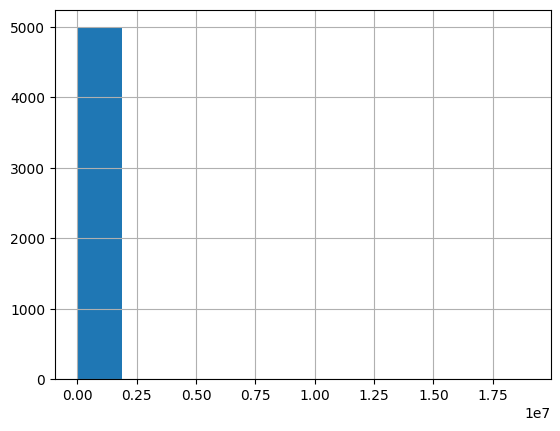

In [10]:
df["AMT_NET_INCOME"].hist()
df["AMT_NET_INCOME"].describe()

In [11]:
df["AMT_NET_INCOME"].max()

19000600

In [12]:
df["AMT_NET_INCOME"].min()

3500

In [13]:
df["AMT_NET_INCOME"].median()

21000.0

In [14]:
df["AMT_NET_INCOME"].mean()

27041.529

In [15]:
df["AMT_NET_INCOME"].sum() / len(df["AMT_NET_INCOME"])

27041.529

In [16]:
df["NUM_AGE"].value_counts()

20    285
23    273
25    270
24    268
27    263
     ... 
76      2
84      1
83      1
80      1
72      1
Name: NUM_AGE, Length: 62, dtype: int64

count    5000.000000
mean       30.587400
std        10.934271
min        18.000000
25%        23.000000
50%        27.000000
75%        36.000000
max        84.000000
Name: NUM_AGE, dtype: float64

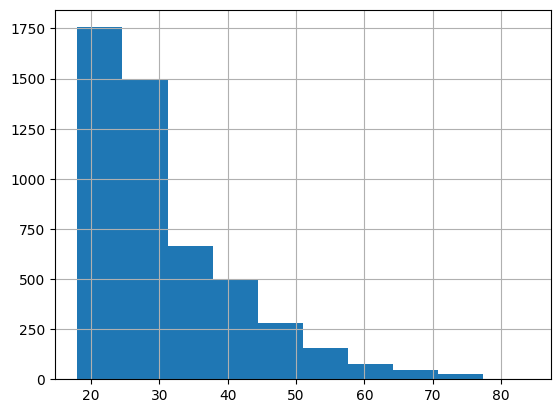

In [17]:
df["NUM_AGE"].hist()
df["NUM_AGE"].describe()

In [18]:
df["NUM_AGE"].max()

84

In [19]:
df["NUM_AGE"].min()

18

In [20]:
84-18

66

In [21]:
df["NUM_AGE"].mode()

0    20
Name: NUM_AGE, dtype: int64

In [22]:
df["NUM_AGE"].mode()

0    20
Name: NUM_AGE, dtype: int64

In [23]:
df["TEXT_GENDER"].value_counts()

Muž     2897
Žena    2103
Name: TEXT_GENDER, dtype: int64

count     5000.000000
mean      7929.200000
std       4532.360954
min       1000.000000
25%       4000.000000
50%       8000.000000
75%      10000.000000
max      20000.000000
Name: AMT_REQUESTED_TICKET, dtype: float64

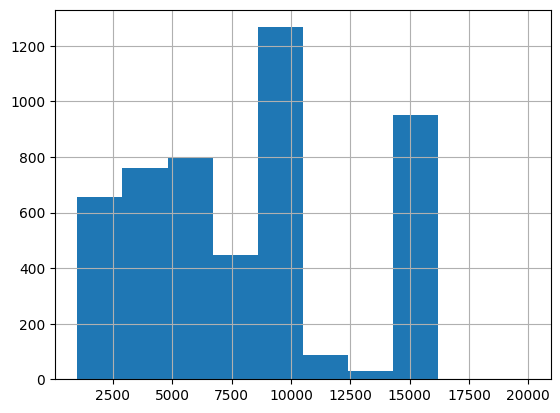

In [24]:
df["AMT_REQUESTED_TICKET"].hist()
df["AMT_REQUESTED_TICKET"].describe()

In [25]:
df["TEXT_BANK"].value_counts()

Česká spořitelna, a.s.                              1254
MONETA Money Bank, a.s.                              712
Air Bank a.s.                                        677
Československá obchodní banka, a.s.                  610
Komerční banka, a.s.                                 499
Equa bank a.s.                                       349
Raiffeisenbank a.s.                                  282
Fio banka, a.s.                                      239
UniCredit Bank Czech Republic and Slovakia, a.s.     178
mBank S.A., organizační složka                       141
Sberbank CZ, a.s.                                     13
BNP Paribas Personal Finance SA, odštěpný závod        9
Waldviertler Sparkasse Bank AG                         3
Banka CREDITAS a.s.                                    3
Name: TEXT_BANK, dtype: int64

In [26]:
df["NFLAG_MOBILEDEVICE"].value_counts()

1    3288
0    1712
Name: NFLAG_MOBILEDEVICE, dtype: int64

In [27]:
df["CODE_IP_1"].value_counts()

37     989
46     530
89     455
193    346
109    237
      ... 
196      1
139      1
100      1
41       1
160      1
Name: CODE_IP_1, Length: 61, dtype: int64

count    5000.000000
mean       98.467200
std        59.923827
min         5.000000
25%        46.000000
50%        86.000000
75%       176.000000
max       217.000000
Name: CODE_IP_1, dtype: float64

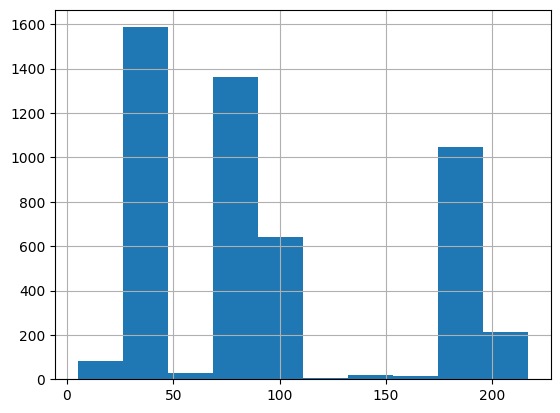

In [28]:
df["CODE_IP_1"].hist()
df["CODE_IP_1"].describe()

In [29]:
df["NUM_LEVEN_EMAIL"].value_counts()

93    335
94    255
92    212
91    185
50    155
     ... 
81      2
6       1
61      1
52      1
21      1
Name: NUM_LEVEN_EMAIL, Length: 84, dtype: int64

count    5000.000000
mean       62.141800
std        28.476332
min         0.000000
25%        36.000000
50%        71.000000
75%        90.000000
max        96.000000
Name: NUM_LEVEN_EMAIL, dtype: float64

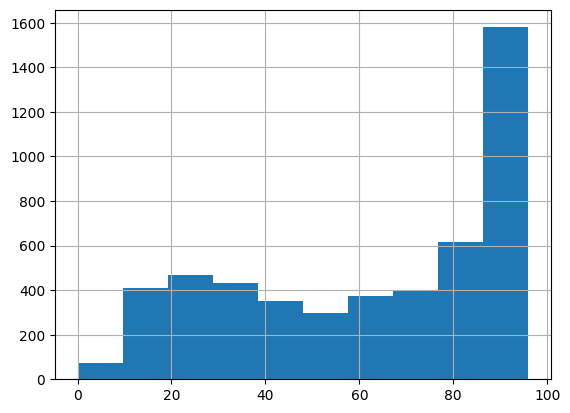

In [30]:
df["NUM_LEVEN_EMAIL"].hist()
df["NUM_LEVEN_EMAIL"].describe()

In [31]:
df["NFLAG_EMAIL_NUMERAL"].value_counts()

0    3448
1    1552
Name: NFLAG_EMAIL_NUMERAL, dtype: int64

In [32]:
df["CNT_REJECTED"].value_counts()

1     3972
0      729
2      146
3       69
4       32
5       15
6        9
7        7
8        7
10       4
12       2
11       2
13       2
14       1
17       1
9        1
20       1
Name: CNT_REJECTED, dtype: int64

count     5000.00000
mean      1539.89000
std       2672.32718
min          0.00000
25%        150.00000
50%       1100.00000
75%       2100.00000
max      43700.00000
Name: NUM_DAYS_CREDIT_HISTORY, dtype: float64

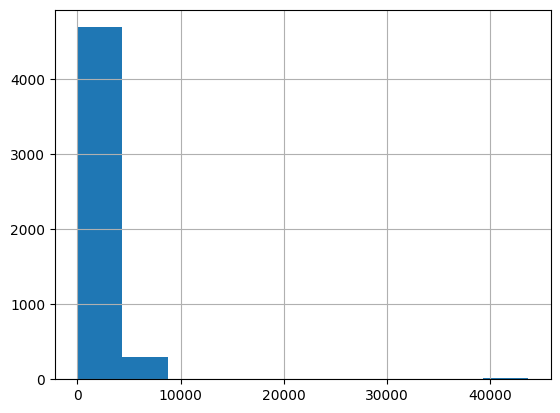

In [33]:
df["NUM_DAYS_CREDIT_HISTORY"].hist()
df["NUM_DAYS_CREDIT_HISTORY"].describe()

In [34]:
binned_age = pd.cut(
    df["NUM_AGE"],
    [18, 28, 38, 48, 58, 68, 78, 88], 
    labels=["18-28", "29-38", "39-48", "49-58", "59-68", "69-78", "79-88"]
)
binned_age.value_counts()

18-28    2559
29-38    1242
39-48     624
49-58     235
59-68      98
69-78      44
79-88       3
Name: NUM_AGE, dtype: int64

In [35]:
pd.crosstab(binned_age, df["TEXT_GENDER"])

TEXT_GENDER,Muž,Žena
NUM_AGE,,
18-28,1567,992
29-38,757,485
39-48,313,311
49-58,115,120
59-68,38,60
69-78,11,33
79-88,0,3


We have 5000 rows (samples) and 13 columns (features).
One row should correspond to one applicant.
The features:
- CODE_ZIP -- zip code of location of applicant, 1430 unique zip codes
- AMT_NET_INCOME - average monthly income in crowns, mean is 27041.529 and median is 21000, this should most likely represent income after taxes
- AMT_REQUESTED_TICKET - average monthly requested ticket
- TEXT_BANK - bank of the appliccant, we have 14 banks with most in Ceska sporitelna
- NUM_AGE - numeric age from 18 to 84
- TEXT_GENDER - gender in format "Muž" "Žena" with more men
- NFLAG_MOBILEDEVICE - flag if applicant uses mobile device, more applicants use it (approx 2:1 for use:dont use) 
- CODE_IP_1 - no idea what this means
- NUM_LEVEN_EMAIL - no idea
- NFLAG_EMAIL_NUMERAL - whether applicant uses email
- CNT_REJECTED - I guess this should be whether last one was rejected?
- NUM_DAYS_CREDIT_HISTORY - number of days of credit history
- TARGET - whether loan wasnt paid on time and properly


[Q1] What's the highest age of applicants? (Jaký je nejvyšší věk žadatele?)

[A1] Highest age is 84 years. We just take the maximum value of NUM_AGE column.


[Q2] What is the mode age of applicant? (Jaký je modus věku žadatele?)
Mode age of applicant is 20 years. Here we take the age that occurs most often.

[Q3] What is the average income of applicant and how does that differ fro the average in Czech republic? (Jaký je prúměrný příjem žadatele a jak se liší od prúměru v ČR?)

[A3] Average income of applicant is 27041.529. This should represent income that arrives to applicants bank account. We could calculate is as sum of average income for each applicant divided by number of applicants. 40086 is the average monthly GROSS income in Czech republic (https://www.czso.cz/csu/czso/cri/prumerne-mzdy-2-ctvrtleti-2022). I wasnt able to find information about salary after taxes (čistá mzda), thus I use online calculator (https://www.vypocet.cz/cista-mzda) to calculate it from the found gross income (we ignore kids/students etc..). The result is: 32231. Thus the average monthly income in Czech republic currently is higher than the one in the dataset. However this can be caused by me using the most recent statistics while the dataset contains bit more historic data.


[Q4] In what age groups are more men than women? (Ve kterých věkových skupinách (18-28, 29-38, 39-48, ..) je více mužú než žen?)

[A4] In age groups 18-28, 29-38, and 39-48. I calculated this by creating age bins and then contingency table to count all possible combinations of age bins with gender.

## Advanced Target Analysis

We analyse the target variable.

In [36]:
df["TARGET"].value_counts()

0    4503
1     497
Name: TARGET, dtype: int64

In [37]:
def get_target_rate(df):
    
    return df["TARGET"].value_counts(normalize=True)[1]

get_target_rate(df)

0.0994

In [38]:
pd.crosstab( df["TEXT_BANK"], df["TARGET"], normalize="index").sort_values(by=1, ascending=False)

TARGET,0,1
TEXT_BANK,,
"BNP Paribas Personal Finance SA, odštěpný závod",0.777778,0.222222
Raiffeisenbank a.s.,0.843972,0.156028
"mBank S.A., organizační složka",0.879433,0.120567
"Česká spořitelna, a.s.",0.886762,0.113238
"UniCredit Bank Czech Republic and Slovakia, a.s.",0.893258,0.106742
Air Bank a.s.,0.895126,0.104874
"Fio banka, a.s.",0.907950,0.092050
"Komerční banka, a.s.",0.915832,0.084168
Equa bank a.s.,0.916905,0.083095


[Q5] Ve které bance je největší target rate (tedy poměr počtu TARGET=1 na celku)?

[A5] In bank BNP Paribas Personal Finance SA, odštěpný závod. We create contingency table, normalize it and take the one with highest ratio.

In [39]:
df.columns

Index(['CODE_ZIP', 'AMT_NET_INCOME', 'AMT_REQUESTED_TICKET', 'TEXT_BANK',
       'NUM_AGE', 'TEXT_GENDER', 'NFLAG_MOBILEDEVICE', 'CODE_IP_1',
       'NUM_LEVEN_EMAIL', 'NFLAG_EMAIL_NUMERAL', 'CNT_REJECTED',
       'NUM_DAYS_CREDIT_HISTORY', 'TARGET'],
      dtype='object')

count    5000.000000
mean       30.587400
std        10.934271
min        18.000000
25%        23.000000
50%        27.000000
75%        36.000000
max        84.000000
Name: NUM_AGE, dtype: float64

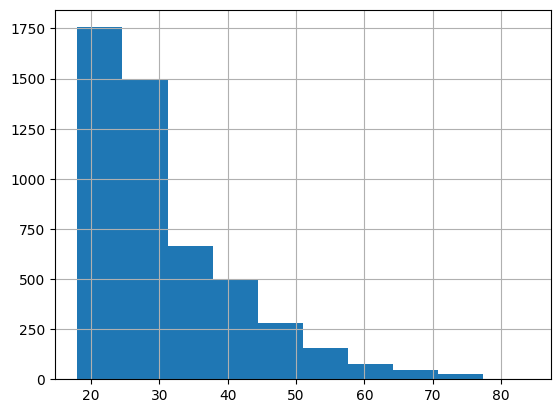

In [40]:
df["NUM_AGE"].hist()
df["NUM_AGE"].describe()

count    497.000000
mean      30.028169
std       12.605651
min       18.000000
25%       21.000000
50%       26.000000
75%       35.000000
max       80.000000
Name: NUM_AGE, dtype: float64

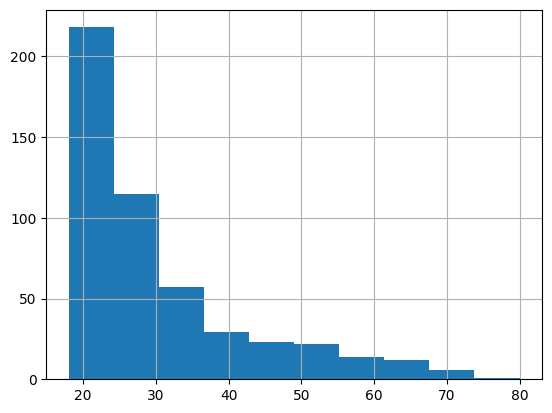

In [41]:
df[df["TARGET"] == 1]["NUM_AGE"].hist()
df[df["TARGET"] == 1]["NUM_AGE"].describe()

count    4503.000000
mean       30.649123
std        10.733677
min        18.000000
25%        23.000000
50%        27.000000
75%        36.000000
max        84.000000
Name: NUM_AGE, dtype: float64

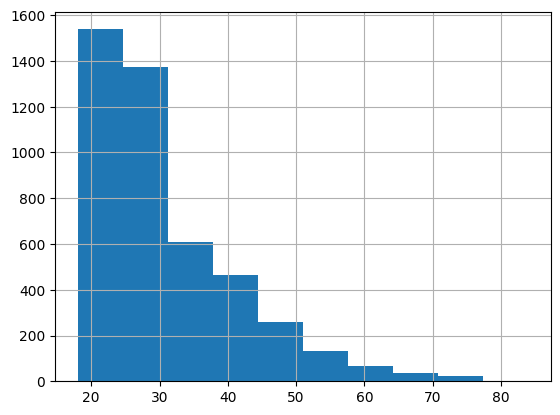

In [42]:
df[df["TARGET"] == 0]["NUM_AGE"].hist()
df[df["TARGET"] == 0]["NUM_AGE"].describe()

We can see that if we divide dataset by target the age distribution is similar tho not identical.
Next we use optimal binning library.

In [43]:
from optbinning import OptimalBinning
x = df["NUM_AGE"].values
y = df["TARGET"]
optb = OptimalBinning(name="NUM_AGE", dtype="numerical", solver="cp").fit(x, y)

In [44]:
optb.status

'OPTIMAL'

In [45]:
optb.splits

array([19.5, 20.5, 23.5, 26.5, 30.5, 36.5, 40.5, 51.5])

In [46]:
optb.binning_table.build()

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 19.50)",417,0.0834,331,86,0.206235,-0.856138,0.085213,0.010338
1,"[19.50, 20.50)",285,0.0570,251,34,0.119298,-0.204817,0.002595,0.000324
2,"[20.50, 23.50)",786,0.1572,709,77,0.097964,0.016141,0.000041,0.000005
3,"[23.50, 26.50)",792,0.1584,723,69,0.087121,0.145394,0.003159,0.000395
4,"[26.50, 30.50)",834,0.1668,767,67,0.080336,0.233885,0.008308,0.001036
5,"[30.50, 36.50)",721,0.1442,664,57,0.079057,0.251322,0.008236,0.001027
6,"[36.50, 40.50)",320,0.0640,303,17,0.053125,0.67661,0.022384,0.002746
7,"[40.50, 51.50)",559,0.1118,516,43,0.076923,0.280998,0.007888,0.000983
8,"[51.50, inf)",286,0.0572,239,47,0.164336,-0.577593,0.023965,0.002955
9,Special,0,0.0000,0,0,0.000000,0.0,0.000000,0.000000


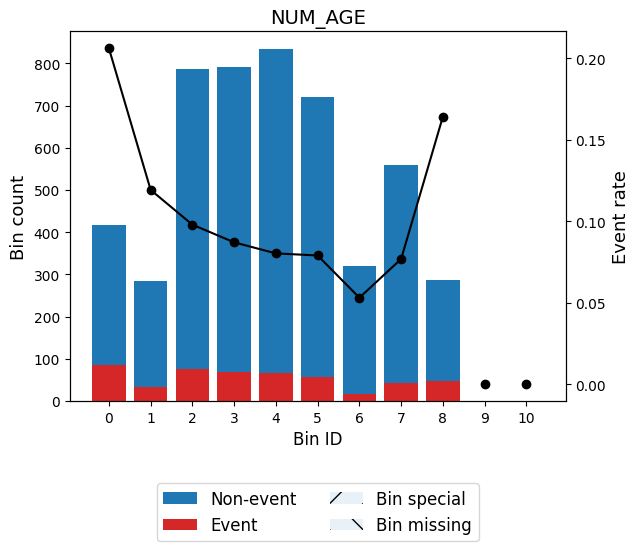

In [47]:
optb.binning_table.plot(metric="event_rate")

In [48]:
df["BIN_AGE"] = optb.transform(x, metric="bins")

In [49]:
pd.crosstab(df["BIN_AGE"], df["TARGET"], normalize="index").sort_values(by=1, ascending=False)

TARGET,0,1
BIN_AGE,,
"(-inf, 19.50)",0.793765,0.206235
"[51.50, inf)",0.835664,0.164336
"[19.50, 20.50)",0.880702,0.119298
"[20.50, 23.50)",0.902036,0.097964
"[23.50, 26.50)",0.912879,0.087121
"[26.50, 30.50)",0.919664,0.080336
"[30.50, 36.50)",0.920943,0.079057
"[40.50, 51.50)",0.923077,0.076923
"[36.50, 40.50)",0.946875,0.053125


[Q6] Try to find ideal age categories to analyze target rate. (Pokuste se vytvořit vhodné věkové kategorie pro zkoumání target rate.)

[A6] We used the optimal binning library which uses mathematical programming to find the optimal bins regarding the target variable (see https://arxiv.org/pdf/2001.08025.pdf and https://github.com/guillermo-navas-palencia/optbinning). The found bins are 0-19, 20, 21-23, 23-26, 26-30, 31-36, 37-41, 41-51, 52+. The highest target rate is for 0-19 and lowest for 37-41.

In [50]:
target_rate_per_age_and_bank = pd.crosstab(
    [df["TEXT_BANK"], df["BIN_AGE"]], df["TARGET"], normalize="index"
).drop(columns=[0]).rename(columns={1: "TARGET_RATE"})
target_rate_per_age_and_bank.sort_values(by="TARGET_RATE", ascending=False)

,TARGET,TARGET_RATE
TEXT_BANK,BIN_AGE,
Raiffeisenbank a.s.,"[51.50, inf)",0.562500
"BNP Paribas Personal Finance SA, odštěpný závod","[26.50, 30.50)",0.400000
"UniCredit Bank Czech Republic and Slovakia, a.s.","(-inf, 19.50)",0.320000
"Fio banka, a.s.","(-inf, 19.50)",0.307692
"mBank S.A., organizační složka","[51.50, inf)",0.300000
...,...,...
Waldviertler Sparkasse Bank AG,"[30.50, 36.50)",0.000000
"Komerční banka, a.s.","[51.50, inf)",0.000000
"BNP Paribas Personal Finance SA, odštěpný závod","[51.50, inf)",0.000000


In [51]:
target_rate_per_age_and_bank.reset_index()

TARGET,TEXT_BANK,BIN_AGE,TARGET_RATE
0,Air Bank a.s.,"(-inf, 19.50)",0.283582
1,Air Bank a.s.,"[19.50, 20.50)",0.166667
2,Air Bank a.s.,"[20.50, 23.50)",0.075630
3,Air Bank a.s.,"[23.50, 26.50)",0.091667
4,Air Bank a.s.,"[26.50, 30.50)",0.094828
...,...,...,...
100,"Česká spořitelna, a.s.","[26.50, 30.50)",0.065657
101,"Česká spořitelna, a.s.","[30.50, 36.50)",0.082873
102,"Česká spořitelna, a.s.","[36.50, 40.50)",0.073529
103,"Česká spořitelna, a.s.","[40.50, 51.50)",0.139073


Text(0.5, 1.0, 'Target rate per age')

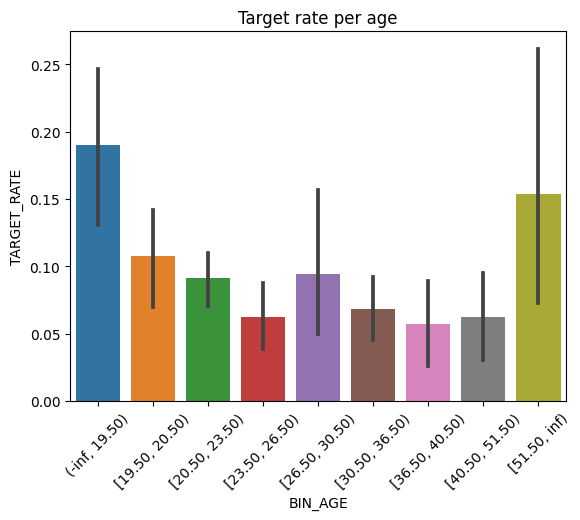

In [52]:
sns.barplot(data=target_rate_per_age_and_bank.reset_index(), x="BIN_AGE", y="TARGET_RATE")
plt.xticks(rotation=45)
plt.title("Target rate per age")

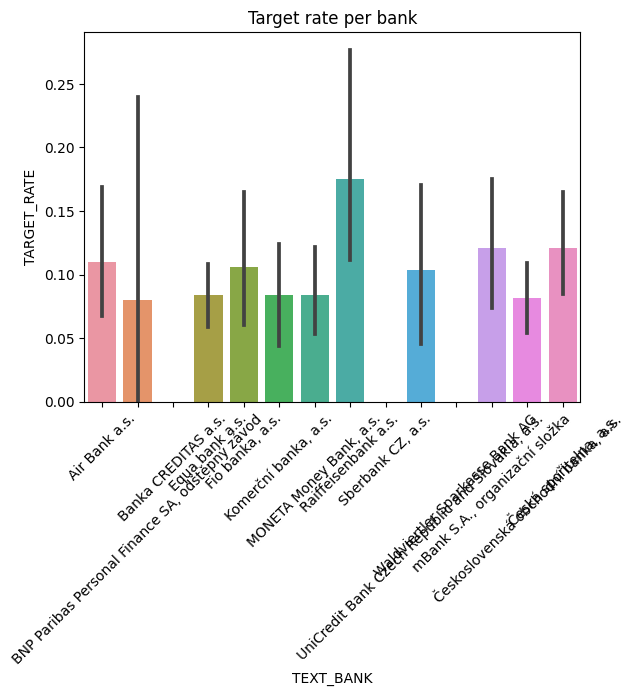

In [53]:
sns.barplot(data=target_rate_per_age_and_bank.reset_index(), x="TEXT_BANK", y="TARGET_RATE")
plt.xticks(rotation=45)
plt.title("Target rate per bank")
plt.show()

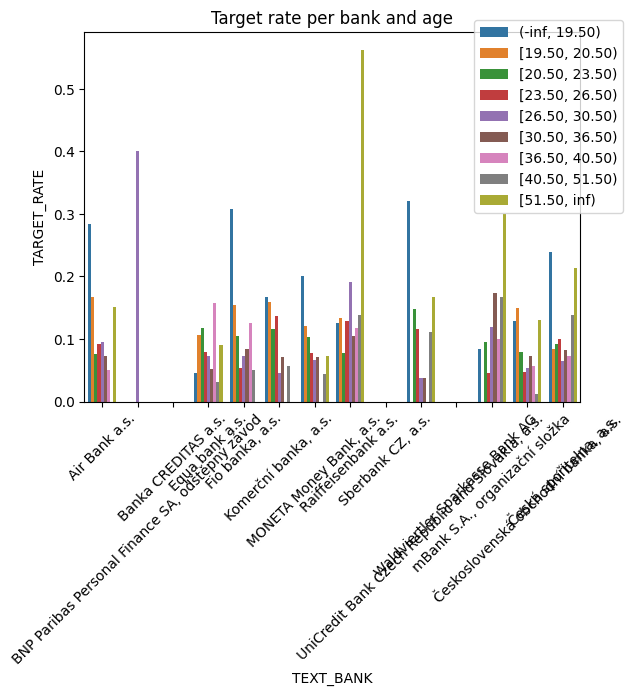

In [54]:
sns.barplot(data=target_rate_per_age_and_bank.reset_index(), x="TEXT_BANK", y="TARGET_RATE", hue="BIN_AGE")
plt.xticks(rotation=45)
plt.title("Target rate per bank and age")
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

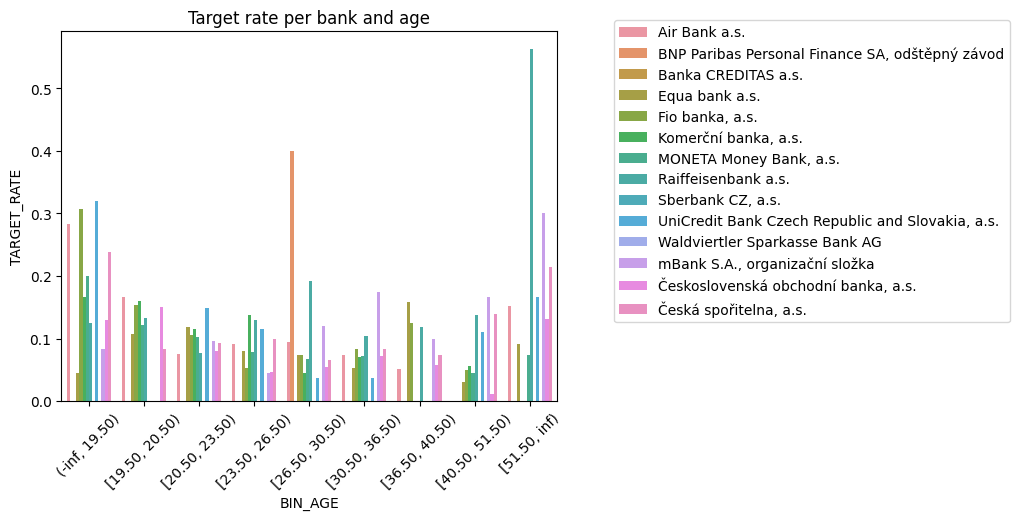

In [55]:
sns.barplot(data=target_rate_per_age_and_bank.reset_index(), x="BIN_AGE", y="TARGET_RATE", hue="TEXT_BANK")
plt.xticks(rotation=45)
plt.title("Target rate per bank and age")
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


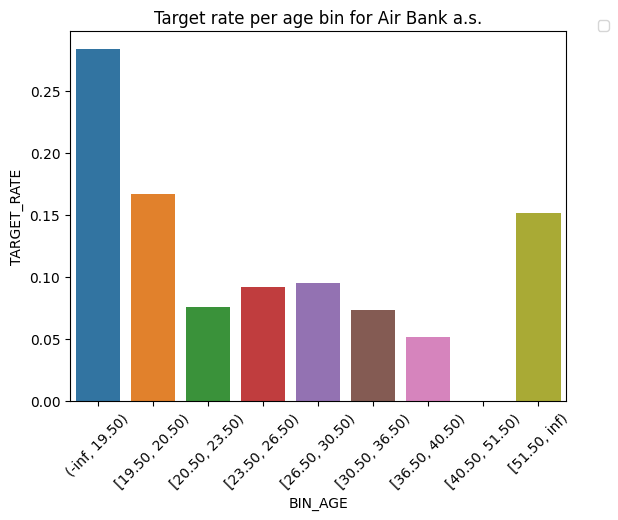

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


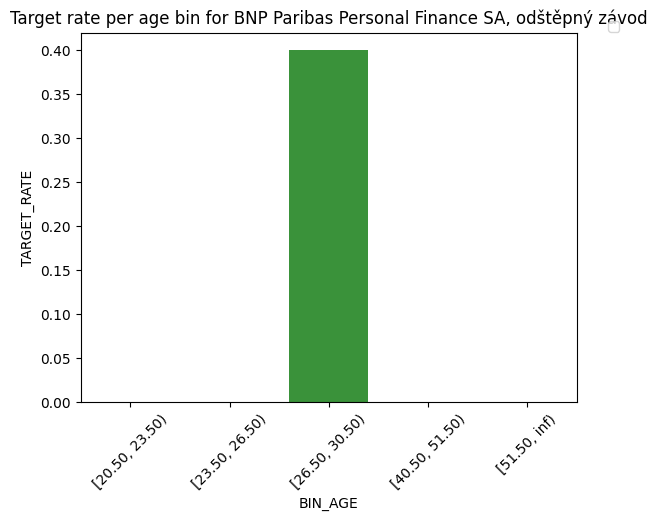

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


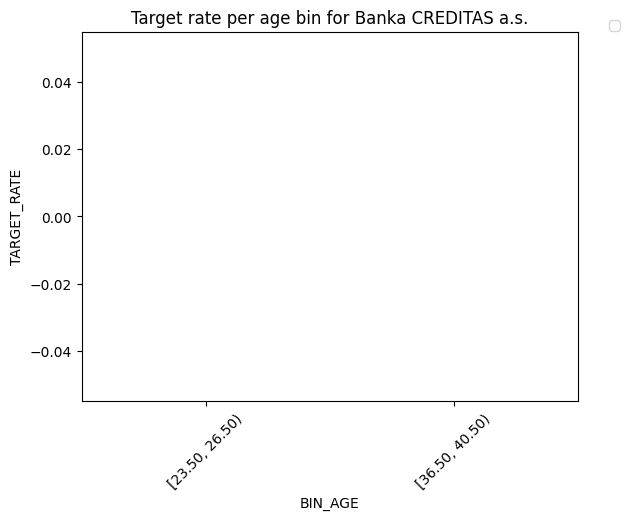

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


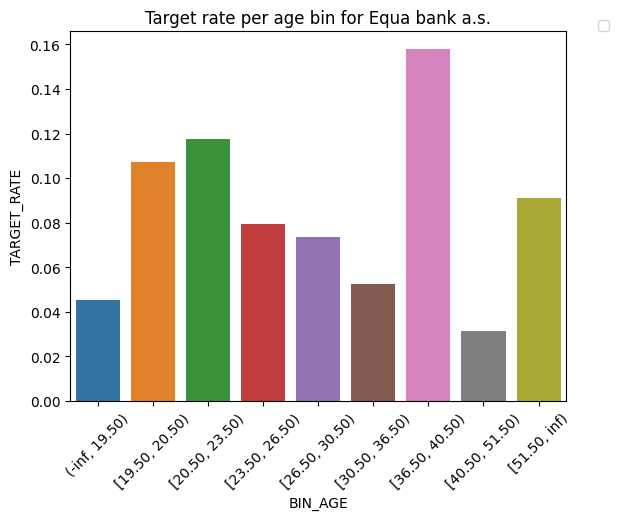

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


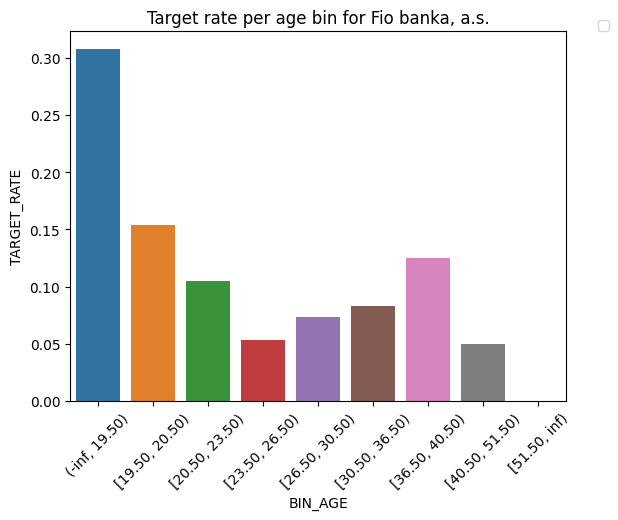

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


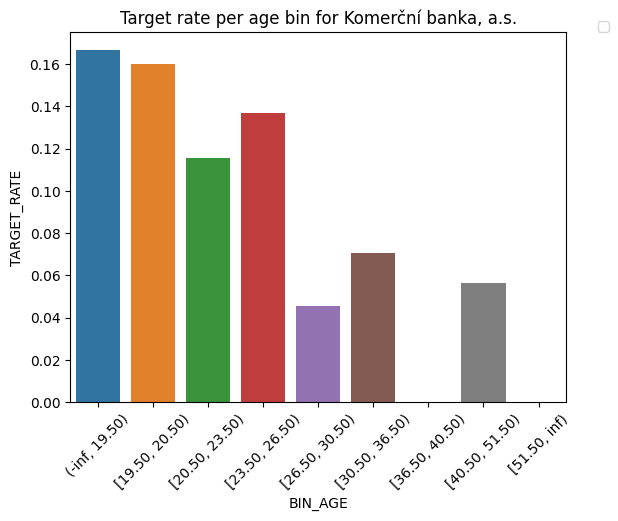

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


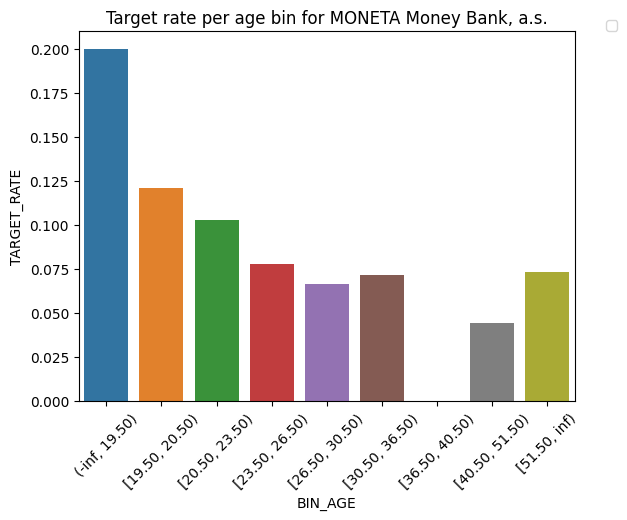

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


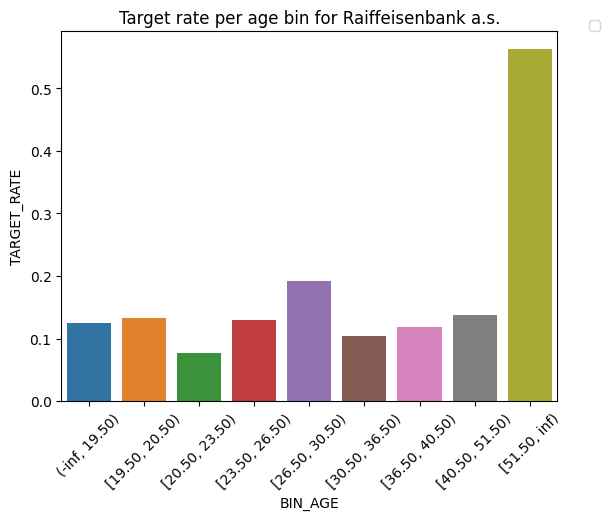

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


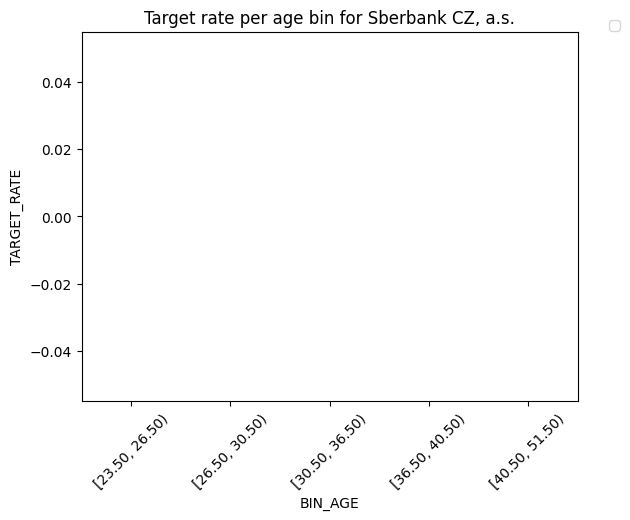

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


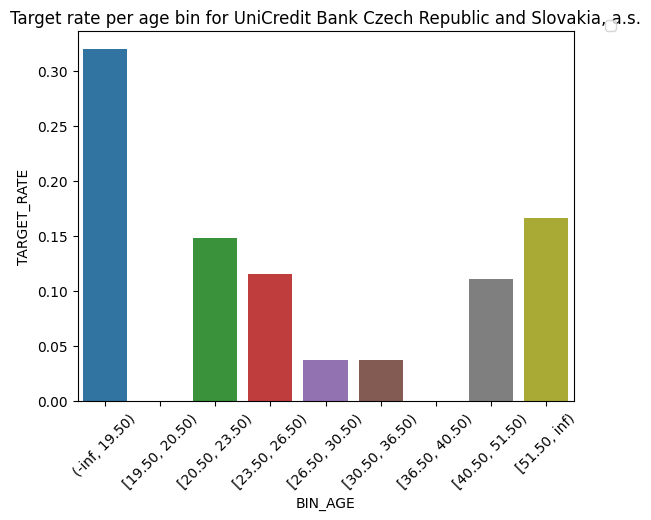

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


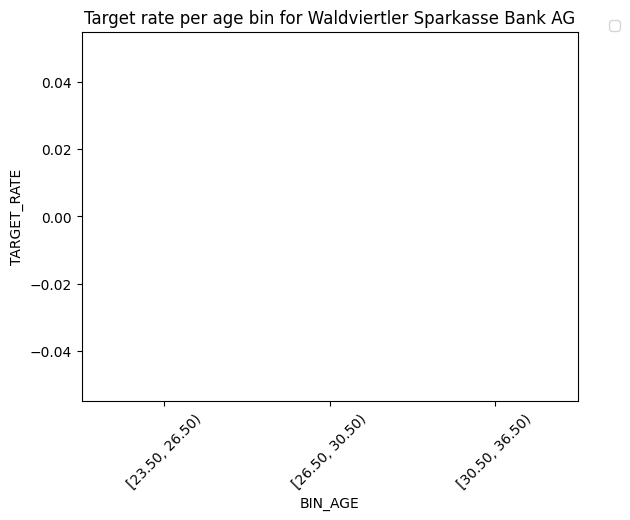

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


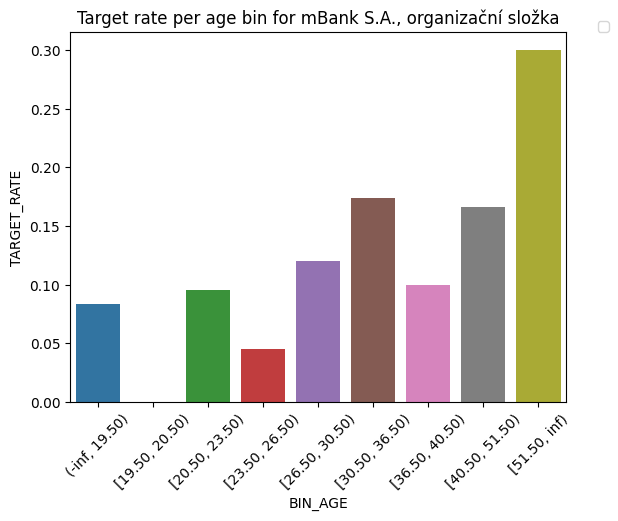

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


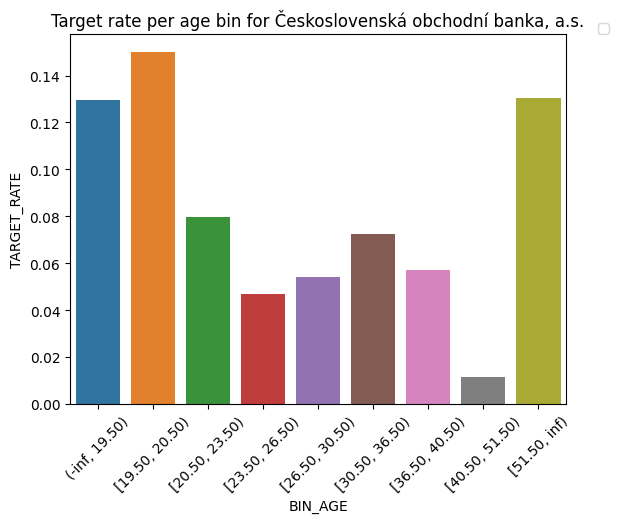

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


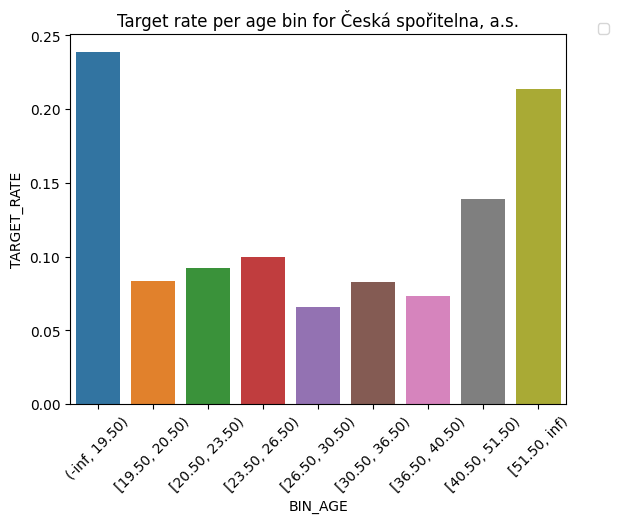

In [56]:
for b in target_rate_per_age_and_bank.reset_index()["TEXT_BANK"].unique():
    
    sns.barplot(data=target_rate_per_age_and_bank.loc[b].reset_index(), x="BIN_AGE", y="TARGET_RATE")
    plt.xticks(rotation=45)
    plt.title(f"Target rate per age bin for {b}")
    plt.legend(bbox_to_anchor=(1.1, 1.05))
    plt.show()

[Q7] How does target rate differ for different banks according to age? (Jak se liší výsledky target rate podle jednotlivých bank v závislosti na věku?)

[A7] We can leverage our binned age and bank to create contingency table and then extract the target rate (ratio of True target to False+True). Further we can create barplots here (where y is target rate and x/hue are age bin and bank). Then we can inspect the numbers and see differences:
- for example air bank, and fio have the highest target rate for people up to 19 years old (including)
- obchodni banka has highest target rate for 20 years old
- raiffeisen for people from 52 years
- equa bank for 37-40 years old
Further we could focus more on some banks and look at the trends more or even inspect histograms of age per target and bank (two histograms per each bank). We could also leverage two-way ANOVA to test difference between numerical age according to interaction between TARGET and BANK. But I think the plots tell us more about the differences in target rate.

## Approval criterions

In [57]:
tab = pd.crosstab(
    df["TEXT_GENDER"], df["TARGET"], margins=True
)
tab["TARGET_RATE"] = tab[1] / tab["All"]
tab.drop(columns=[0,1]).sort_values(by="TARGET_RATE", ascending=False)
tab[(tab["All"] >= 0.04 * 5000) & (tab["All"] <= 0.06 * 5000)]

TARGET,0,1,All,TARGET_RATE
TEXT_GENDER,,,,


In [58]:
tab = pd.crosstab(
    df["BIN_AGE"], df["TARGET"], margins=True
)
tab["TARGET_RATE"] = tab[1] / tab["All"]
tab.drop(columns=[0,1]).sort_values(by="TARGET_RATE", ascending=False)
tab[(tab["All"] >= 0.04 * 5000) & (tab["All"] <= 0.06 * 5000)]

TARGET,0,1,All,TARGET_RATE
BIN_AGE,,,,
"[19.50, 20.50)",251,34,285,0.119298
"[51.50, inf)",239,47,286,0.164336


In [59]:
tab = pd.crosstab(
    [df["BIN_AGE"],df["TEXT_GENDER"]], df["TARGET"], margins=True
)
tab["TARGET_RATE"] = tab[1] / tab["All"]
tab.drop(columns=[0,1]).sort_values(by="TARGET_RATE", ascending=False)
tab[(tab["All"] >= 0.04 * 5000) & (tab["All"] <= 0.06 * 5000)]

TARGET                        0   1  All  TARGET_RATE
BIN_AGE        TEXT_GENDER                           
(-inf, 19.50)  Muž          173  43  216     0.199074
               Žena         158  43  201     0.213930
[23.50, 26.50) Žena         276  20  296     0.067568
[30.50, 36.50) Žena         268  16  284     0.056338
[40.50, 51.50) Muž          241  25  266     0.093985
               Žena         275  18  293     0.061433

In [60]:
tab = pd.crosstab(
    [df["BIN_AGE"],df["TEXT_GENDER"]], 
    df["TARGET"], 
    margins=True
)
tab["TARGET_RATE"] = tab[1] / tab["All"]
tab.drop(columns=[0,1]).sort_values(by="TARGET_RATE", ascending=False)
tab[(tab["All"] >= 0.04 * 5000) & (tab["All"] <= 0.06 * 5000)]

TARGET                        0   1  All  TARGET_RATE
BIN_AGE        TEXT_GENDER                           
(-inf, 19.50)  Muž          173  43  216     0.199074
               Žena         158  43  201     0.213930
[23.50, 26.50) Žena         276  20  296     0.067568
[30.50, 36.50) Žena         268  16  284     0.056338
[40.50, 51.50) Muž          241  25  266     0.093985
               Žena         275  18  293     0.061433

count    4.503000e+03
mean     2.752179e+04
std      2.830010e+05
min      3.500000e+03
25%      1.700000e+04
50%      2.100000e+04
75%      2.800000e+04
max      1.900060e+07
Name: AMT_NET_INCOME, dtype: float64

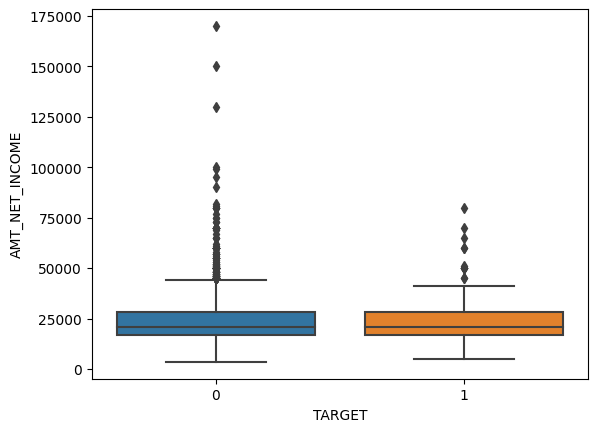

In [61]:
sns.boxplot(df[df["AMT_NET_INCOME"] <= 1e7], x="TARGET", y="AMT_NET_INCOME")
df[df["TARGET"] == 0]["AMT_NET_INCOME"].describe()

count     4503.000000
mean      7782.145237
std       4532.700782
min       1000.000000
25%       4000.000000
50%       8000.000000
75%      10000.000000
max      20000.000000
Name: AMT_REQUESTED_TICKET, dtype: float64

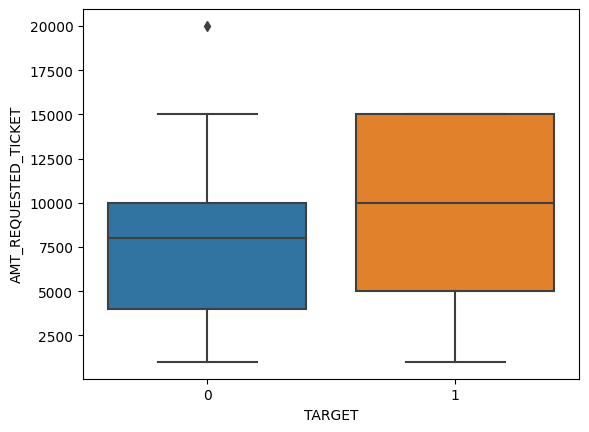

In [62]:
sns.boxplot(df, x="TARGET", y="AMT_REQUESTED_TICKET")
df[df["TARGET"] == 0]["AMT_REQUESTED_TICKET"].describe()

count     4503.000000
mean      1615.056629
std       2775.935379
min          0.000000
25%        200.000000
50%       1150.000000
75%       2150.000000
max      43700.000000
Name: NUM_DAYS_CREDIT_HISTORY, dtype: float64

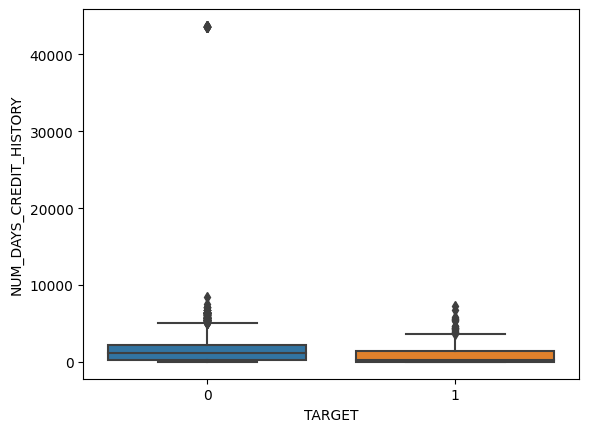

In [63]:
sns.boxplot(df, x="TARGET", y="NUM_DAYS_CREDIT_HISTORY")
df[df["TARGET"] == 0]["NUM_DAYS_CREDIT_HISTORY"].describe()

In [64]:
# candidates 
# >= 1615 CREDIT HISTORY
# > 10 000 AMT_REQUESTED_TICKET
# > 80 000AMT_NET_INCOME
credit_history_rule = df["NUM_DAYS_CREDIT_HISTORY"] <= 1615 # under mean of TARGET=0
ticket_rule = df["AMT_REQUESTED_TICKET"] > 10000 # all above that are approved
income_rule = df["AMT_NET_INCOME"] <= 80000 # some outliers are above that only for reject

In [65]:
tab = pd.crosstab(
    income_rule, 
    df["TARGET"], 
    margins=True
)
tab["TARGET_RATE"] = tab[1] / tab["All"]
tab.drop(columns=[0,1], inplace=True)
tab.sort_values(by="TARGET_RATE", ascending=False, inplace=True)
tab
#tab[(tab["All"] >= 0.04 * 5000) & (tab["All"] <= 0.06 * 5000)]

TARGET,All,TARGET_RATE
AMT_NET_INCOME,,
True,4990,0.099599
All,5000,0.099400
False,10,0.000000


In [66]:
tab = pd.crosstab(
    ticket_rule, 
    df["TARGET"], 
    margins=True
)
tab["TARGET_RATE"] = tab[1] / tab["All"]
tab.drop(columns=[0,1], inplace=True)
tab.sort_values(by="TARGET_RATE", ascending=False, inplace=True)
tab
#tab[(tab["All"] >= 0.04 * 5000) & (tab["All"] <= 0.06 * 5000)]

TARGET,All,TARGET_RATE
AMT_REQUESTED_TICKET,,
True,1070,0.134579
All,5000,0.099400
False,3930,0.089822


In [67]:
tab = pd.crosstab(
    credit_history_rule, 
    df["TARGET"], 
    margins=True
)
tab["TARGET_RATE"] = tab[1] / tab["All"]
tab.drop(columns=[0,1], inplace=True)
tab.sort_values(by="TARGET_RATE", ascending=False, inplace=True)
tab
#tab[(tab["All"] >= 0.04 * 5000) & (tab["All"] <= 0.06 * 5000)]

TARGET,All,TARGET_RATE
NUM_DAYS_CREDIT_HISTORY,,
True,3213,0.124494
All,5000,0.099400
False,1787,0.054281


In [68]:
tab = pd.crosstab(
    [credit_history_rule, ticket_rule, income_rule], 
    df["TARGET"], 
    margins=True
)
tab["TARGET_RATE"] = tab[1] / tab["All"]
tab.drop(columns=[0,1], inplace=True)
tab.sort_values(by="TARGET_RATE", ascending=False, inplace=True)
tab
#tab[(tab["All"] >= 0.04 * 5000) & (tab["All"] <= 0.06 * 5000)]

TARGET                                                        All  TARGET_RATE
NUM_DAYS_CREDIT_HISTORY AMT_REQUESTED_TICKET AMT_NET_INCOME                   
True                    True                 True             611     0.188216
                        False                True            2596     0.109784
All                                                          5000     0.099400
False                   True                 True             455     0.063736
                        False                True            1328     0.051205
                                             False              1     0.000000
                        True                 False              3     0.000000
True                    False                False              5     0.000000
                        True                 False              1     0.000000

In [69]:
tab = pd.crosstab(
    [credit_history_rule, ticket_rule, income_rule, df["CNT_REJECTED"]], 
    df["TARGET"], 
    margins=True
)
tab["TARGET_RATE"] = tab[1] / tab["All"]
tab.drop(columns=[0,1], inplace=True)
tab.sort_values(by="TARGET_RATE", ascending=False, inplace=True)
tab[(tab["All"] >= 0.04 * 5000)]

TARGET                                                                     All  \
NUM_DAYS_CREDIT_HISTORY AMT_REQUESTED_TICKET AMT_NET_INCOME CNT_REJECTED         
True                    True                 True           1              493   
                        False                True           0              462   
                                                            1             1949   
All                                                                       5000   
False                   True                 True           1              391   
                        False                True           1             1131   

TARGET                                                                    TARGET_RATE  
NUM_DAYS_CREDIT_HISTORY AMT_REQUESTED_TICKET AMT_NET_INCOME CNT_REJECTED               
True                    True                 True           1                0.190669  
                        False                True           0                0.110390  
                                                            1                0.100051  
All                                                                          0.099400  
False                   True                 True           1                0.061381  
                        False                True           1                0.049514

In [70]:
tab = pd.crosstab(
    [credit_history_rule, ticket_rule, income_rule, df["BIN_AGE"]], 
    df["TARGET"], 
    margins=True
)
tab["TARGET_RATE"] = tab[1] / tab["All"]
tab.drop(columns=[0,1], inplace=True)
tab.sort_values(by="TARGET_RATE", ascending=False, inplace=True)
tab[(tab["All"] >= 0.04 * 5000)]

TARGET                                                                       All  \
NUM_DAYS_CREDIT_HISTORY AMT_REQUESTED_TICKET AMT_NET_INCOME BIN_AGE                
True                    False                True           (-inf, 19.50)    370   
                                                            [19.50, 20.50)   247   
All                                                                         5000   
True                    False                True           [30.50, 36.50)   216   
                                                            [23.50, 26.50)   511   
                                                            [20.50, 23.50)   635   
                                                            [26.50, 30.50)   371   
False                   False                True           [26.50, 30.50)   279   
                                                            [40.50, 51.50)   291   
                                                            [30.50, 36.50)   319   

TARGET                                                                      TARGET_RATE  
NUM_DAYS_CREDIT_HISTORY AMT_REQUESTED_TICKET AMT_NET_INCOME BIN_AGE                      
True                    False                True           (-inf, 19.50)      0.200000  
                                                            [19.50, 20.50)     0.113360  
All                                                                            0.099400  
True                    False                True           [30.50, 36.50)     0.092593  
                                                            [23.50, 26.50)     0.090020  
                                                            [20.50, 23.50)     0.086614  
                                                            [26.50, 30.50)     0.086253  
False                   False                True           [26.50, 30.50)     0.053763  
                                                            [40.50, 51.50)     0.041237  
                                                            [30.50, 36.50)     0.037618

In [71]:
tab = pd.crosstab(
    [credit_history_rule, ticket_rule, income_rule, df["BIN_AGE"], df["CNT_REJECTED"]], 
    df["TARGET"], 
    margins=True
)
tab["TARGET_RATE"] = tab[1] / tab["All"]
tab.drop(columns=[0,1], inplace=True)
tab.sort_values(by="TARGET_RATE", ascending=False, inplace=True)
tab[(tab["All"] >= 0.04 * 5000)]

TARGET                                                                                    All  \
NUM_DAYS_CREDIT_HISTORY AMT_REQUESTED_TICKET AMT_NET_INCOME BIN_AGE        CNT_REJECTED         
True                    False                True           (-inf, 19.50)  1              252   
All                                                                                      5000   
True                    False                True           [23.50, 26.50) 1              376   
                                                            [20.50, 23.50) 1              465   
                                                            [26.50, 30.50) 1              291   
False                   False                True           [26.50, 30.50) 1              229   
                                                            [40.50, 51.50) 1              249   
                                                            [30.50, 36.50) 1              274   

TARGET                                                                                   TARGET_RATE  
NUM_DAYS_CREDIT_HISTORY AMT_REQUESTED_TICKET AMT_NET_INCOME BIN_AGE        CNT_REJECTED               
True                    False                True           (-inf, 19.50)  1                0.182540  
All                                                                                         0.099400  
True                    False                True           [23.50, 26.50) 1                0.090426  
                                                            [20.50, 23.50) 1                0.077419  
                                                            [26.50, 30.50) 1                0.072165  
False                   False                True           [26.50, 30.50) 1                0.048035  
                                                            [40.50, 51.50) 1                0.044177  
                                                            [30.50, 36.50) 1                0.029197

In [72]:
tab = pd.crosstab(
    [credit_history_rule, income_rule, df["BIN_AGE"], df["CNT_REJECTED"]], 
    df["TARGET"], 
    margins=True
)
tab["TARGET_RATE"] = tab[1] / tab["All"]
tab.drop(columns=[0,1], inplace=True)
tab.sort_values(by="TARGET_RATE", ascending=False, inplace=True)
tab[(tab["All"] >= 0.04 * 5000)]

TARGET                                                               All  \
NUM_DAYS_CREDIT_HISTORY AMT_NET_INCOME BIN_AGE        CNT_REJECTED         
True                    True           (-inf, 19.50)  1              282   
                                       [30.50, 36.50) 1              231   
                                       [19.50, 20.50) 1              202   
All                                                                 5000   
True                    True           [23.50, 26.50) 1              470   
                                       [26.50, 30.50) 1              375   
                                       [20.50, 23.50) 1              567   
False                   True           [26.50, 30.50) 1              293   
                                       [40.50, 51.50) 1              346   
                                       [30.50, 36.50) 1              378   

TARGET                                                              TARGET_RATE  
NUM_DAYS_CREDIT_HISTORY AMT_NET_INCOME BIN_AGE        CNT_REJECTED               
True                    True           (-inf, 19.50)  1                0.184397  
                                       [30.50, 36.50) 1                0.108225  
                                       [19.50, 20.50) 1                0.103960  
All                                                                    0.099400  
True                    True           [23.50, 26.50) 1                0.095745  
                                       [26.50, 30.50) 1                0.090667  
                                       [20.50, 23.50) 1                0.086420  
False                   True           [26.50, 30.50) 1                0.051195  
                                       [40.50, 51.50) 1                0.040462  
                                       [30.50, 36.50) 1                0.039683

In [73]:
tab = pd.crosstab(
    [credit_history_rule, income_rule, df["BIN_AGE"], df["NFLAG_MOBILEDEVICE"]], 
    df["TARGET"], 
    margins=True
)
tab["TARGET_RATE"] = tab[1] / tab["All"]
tab.drop(columns=[0,1], inplace=True)
tab.sort_values(by="TARGET_RATE", ascending=False, inplace=True)
tab[(tab["All"] >= 0.04 * 5000)]

TARGET                                                                     All  \
NUM_DAYS_CREDIT_HISTORY AMT_NET_INCOME BIN_AGE        NFLAG_MOBILEDEVICE         
True                    True           (-inf, 19.50)  1                    319   
                                       [19.50, 20.50) 1                    222   
                                       [26.50, 30.50) 1                    320   
                                       [20.50, 23.50) 1                    555   
                                       [23.50, 26.50) 1                    434   
All                                                                       5000   
False                   True           [26.50, 30.50) 1                    262   
                                       [40.50, 51.50) 0                    207   
True                    True           [20.50, 23.50) 0                    209   
False                   True           [30.50, 36.50) 1                    289   

TARGET                                                                    TARGET_RATE  
NUM_DAYS_CREDIT_HISTORY AMT_NET_INCOME BIN_AGE        NFLAG_MOBILEDEVICE               
True                    True           (-inf, 19.50)  1                      0.200627  
                                       [19.50, 20.50) 1                      0.117117  
                                       [26.50, 30.50) 1                      0.115625  
                                       [20.50, 23.50) 1                      0.109910  
                                       [23.50, 26.50) 1                      0.101382  
All                                                                          0.099400  
False                   True           [26.50, 30.50) 1                      0.057252  
                                       [40.50, 51.50) 0                      0.053140  
True                    True           [20.50, 23.50) 0                      0.052632  
False                   True           [30.50, 36.50) 1                      0.041522

In [74]:
tab = pd.crosstab(
    [credit_history_rule, income_rule, df["BIN_AGE"], df["NFLAG_MOBILEDEVICE"], df["CNT_REJECTED"]], 
    df["TARGET"], 
    margins=True
)
tab["TARGET_RATE"] = tab[1] / tab["All"]
tab.drop(columns=[0,1], inplace=True)
tab.sort_values(by="TARGET_RATE", ascending=False, inplace=True)
tab[(tab["All"] >= 0.04 * 5000)]

TARGET                                                                                  All  \
NUM_DAYS_CREDIT_HISTORY AMT_NET_INCOME BIN_AGE        NFLAG_MOBILEDEVICE CNT_REJECTED         
True                    True           (-inf, 19.50)  1                  1              221   
                                       [26.50, 30.50) 1                  1              251   
                                       [23.50, 26.50) 1                  1              334   
All                                                                                    5000   
True                    True           [20.50, 23.50) 1                  1              416   
False                   True           [26.50, 30.50) 1                  1              211   
                                       [30.50, 36.50) 1                  1              251   

TARGET                                                                                 TARGET_RATE  
NUM_DAYS_CREDIT_HISTORY AMT_NET_INCOME BIN_AGE        NFLAG_MOBILEDEVICE CNT_REJECTED               
True                    True           (-inf, 19.50)  1                  1                0.194570  
                                       [26.50, 30.50) 1                  1                0.107570  
                                       [23.50, 26.50) 1                  1                0.101796  
All                                                                                       0.099400  
True                    True           [20.50, 23.50) 1                  1                0.098558  
False                   True           [26.50, 30.50) 1                  1                0.047393  
                                       [30.50, 36.50) 1                  1                0.035857

[Q8] Design the best possible rules that we can use for variables to choose 4-6% records for them to have the best possible target rate. (Navrhněte co nejlepší pravidla, jak pomocí vysvětlujících proměnných ze vzorku vybrat
4-6% záznamů tak, aby ve vybrané sadě byl co největší target rate.)

[A8] Here we experiment with different simple rules and adding them together. For the numerical values I looked at box plots of NUM_DAYS_CREDIT_HISTORY, AMT_REQUESTED_TICKET, AMT_NET_INCOME. I could see most above 10000 requested ticket are approved, and more under 1615 credit history are approved, while there are some outliers that above 80000 income are only rejected. We create three boolean rules out of these values. Then we can also look at other categorical features like binned age, gender, .. Next we just calculate target rates for some promising candidates while moving down to 5% of samples.
We have two promisign results:
- taking only women are up to 19 years old achieves 21% target rate
- takingn people with less credit history than 1615, more income than 10000, age up to 19 years old, mobile device, and CNT_REJECTED we achieve 19.5% target rate

## Feature engineering

In [75]:
psc_external_data = pd.read_csv("../data/external/zv_cobce_psc.csv", encoding='iso-8859-2', sep=";")
psc2okres = psc_external_data[["psc", "nazokresu"]]
psc2okres.set_index("psc", inplace=True)
psc2okres = psc2okres.to_dict()["nazokresu"]

In [76]:
set(df["CODE_ZIP"].to_list()) - set(psc2okres.keys())

{10003,
 11700,
 13401,
 16003,
 19008,
 20306,
 25002,
 27234,
 28003,
 28801,
 37003,
 37012,
 37705,
 41502,
 43002,
 43007,
 44401,
 46361,
 53335,
 56003,
 60407,
 62900,
 68176,
 68356,
 69640,
 69823,
 73000,
 75615,
 77095,
 77200,
 78343,
 79364,
 79900,
 83924}

In [77]:
def add_okres(df, psc2okres, okres_colname="OKRES", psc_colname="CODE_ZIP"):
    
    df[okres_colname] = df[psc_colname].apply(lambda x: psc2okres.get(x, "UNKNOWN"))
    return df
    
df = add_okres(df, psc2okres)

[Q9] (Obohaťte data tak, že přidáte jeden nový atribut odvozený z PSČ, tedy třeba počet obyvatel, okres, kraj nebo cokoliv jiného. Můžete použít jen veřejné zdroje, ty uveďte.)

[A9] We add data from ceska posta (https://www.ceskaposta.cz/ke-stazeni/zakaznicke-vystupy) which should be reliable. However some PSC is missing there (invalid data? new psc?) so we replace it with special UNKNOWN value.

## Modeling

[Q10] Which mathematical model would u recommend to model TARGET variable based on other variables and why would you choose this method? If u want u can create model and comment it. (Jaký matematický model byste doporučili pro modelování cílové proměnné TARGET
za základě ostatních vysvětlujících proměnných a proč byste zvolili právě tuto metodu?
Pokud máte čas a chuť, tak nějaký model vytvořte a okomentujte jeho vhodnost po
použití při schvalování úvěrů)

[A10] We dont have much data available and in this task we should focus on interpretability of our model. Thus I would choose model that can be easily explained to the "customer". My choices would be either logistic regression or nearest neighbours classifier.
Obviously we would need to split our data into train and test sets (we should have actually done that right in the beginning before analysis if we know we gonna model). 
For the features, we would take the ones we already know work (age, bank), the ones which are logicaly needed (income and requested ticket) as our baseline. Then we would consider other features (if they are not correlated like mobile phone with age might be) andd if we can actually legally use the features (can gender and okres be used?). For evaluation metric we would need to take into account the disbalance of accepted and rejected loans by not using accuracy.

## Conclusion (feedback)

Analysis took me 5hours. Issue was that I started the analysis, suddenly I didnt have time.. then I went back to the analysis week later. This meant I had to once again get into the project. The most frustrating was question 8. I had no idea whats the best way to find ideal rules (besides experimenting or doing some bruteforce). Also question 7 was quite hard (I had issue thinking how to decide and answer this). 